In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv
/kaggle/input/house-prices-advanced-regression-techniques/data_description.txt
/kaggle/input/house-prices-advanced-regression-techniques/test.csv
/kaggle/input/house-prices-advanced-regression-techniques/train.csv


In [4]:
train = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/train.csv')
test = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/test.csv')

In [5]:
train.head() # 5 rows and 81 columns

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [7]:
# Target Column is 'SalePrice'
train['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

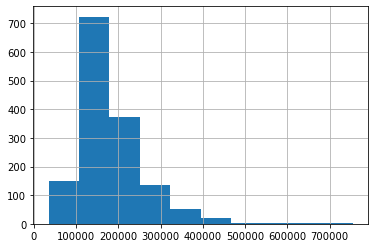

In [8]:
train['SalePrice'].hist()

(array([-100000.,       0.,  100000.,  200000.,  300000.,  400000.,
         500000.,  600000.,  700000.,  800000.,  900000.]),
 <a list of 11 Text major ticklabel objects>)

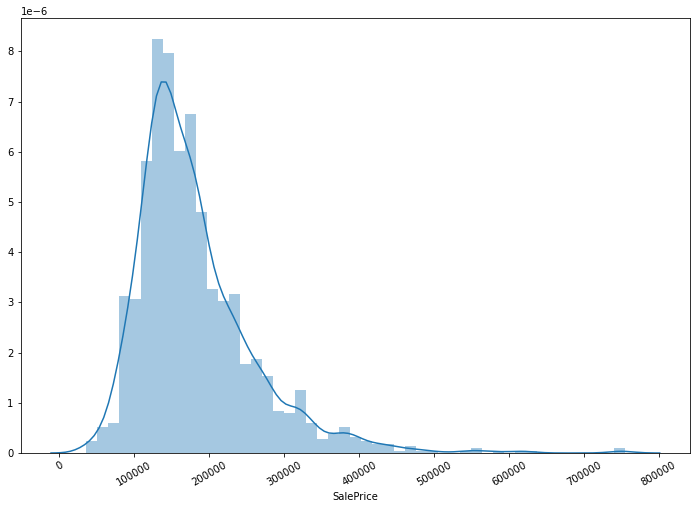

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [12 ,8]

sns.distplot(train['SalePrice'])
plt.xticks(rotation=30)


Above Distribution is **Skewed** (right-skewed)

In [15]:
print(f"Skewness = {train['SalePrice'].skew()}")
# We got a positive value because our data distribution is skewed towards right side.

Skewness = 1.8828757597682129


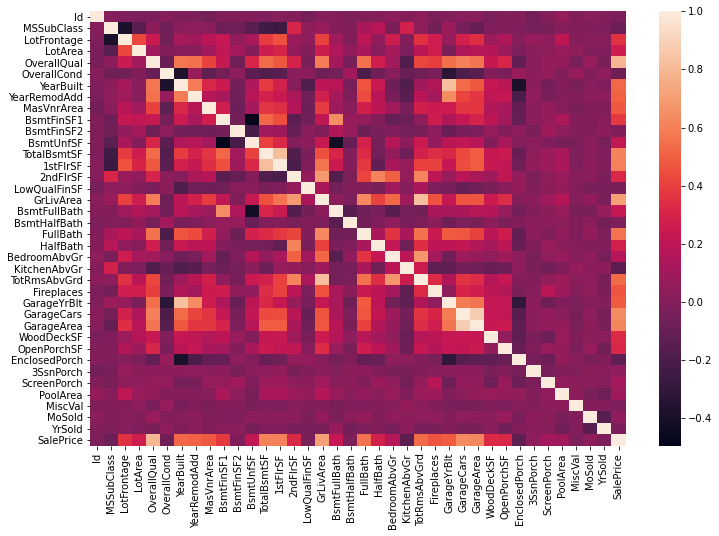

<Figure size 1080x864 with 0 Axes>

In [18]:
sns.heatmap(train.corr())
plt.figure(figsize=(15,12))
plt.show()

In [19]:
# Striking correlation can be found between:
# 1) GrLivArea and TotRmsAbvGrd
# 2) GarageYrBlt and YearBuilt
# 3) 1stFlrSF and TotalBsmtSF
# 4) OverallQual and SalePrice
# 5) GarageArea and GarageCars

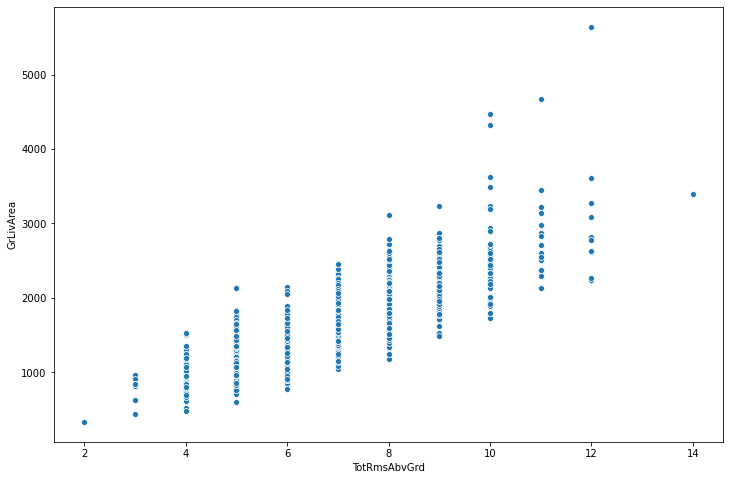

In [20]:
# Let us visualize some trends in the data
sns.scatterplot(train['TotRmsAbvGrd'],train['GrLivArea'],data=train)

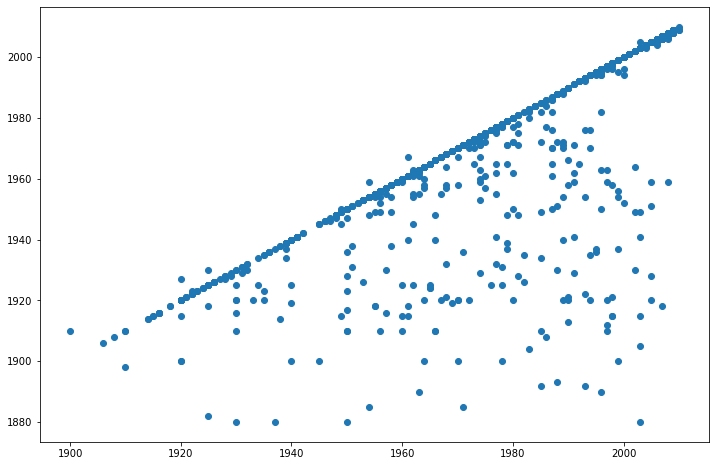

In [21]:
plt.scatter(x=train['GarageYrBlt'], y=train['YearBuilt'])

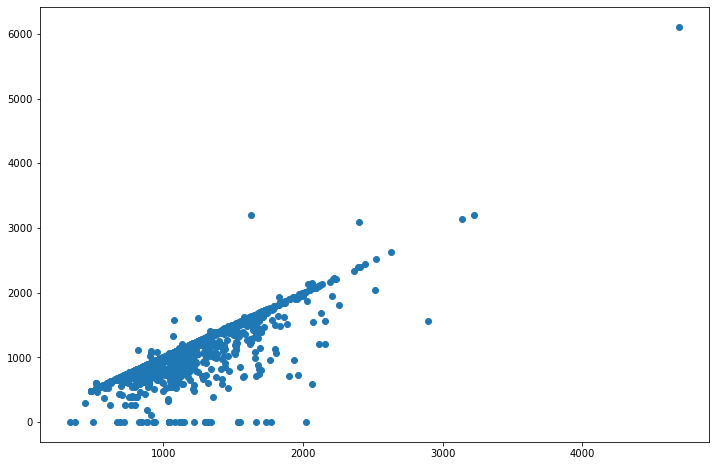

In [22]:
plt.scatter(x=train['1stFlrSF'], y=train['TotalBsmtSF'])

In [25]:
# Check correlation of columns with target variable
corr = train.corr()
print(corr)

                     Id  MSSubClass  LotFrontage   LotArea  OverallQual  \
Id             1.000000    0.011156    -0.010601 -0.033226    -0.028365   
MSSubClass     0.011156    1.000000    -0.386347 -0.139781     0.032628   
LotFrontage   -0.010601   -0.386347     1.000000  0.426095     0.251646   
LotArea       -0.033226   -0.139781     0.426095  1.000000     0.105806   
OverallQual   -0.028365    0.032628     0.251646  0.105806     1.000000   
OverallCond    0.012609   -0.059316    -0.059213 -0.005636    -0.091932   
YearBuilt     -0.012713    0.027850     0.123349  0.014228     0.572323   
YearRemodAdd  -0.021998    0.040581     0.088866  0.013788     0.550684   
MasVnrArea    -0.050298    0.022936     0.193458  0.104160     0.411876   
BsmtFinSF1    -0.005024   -0.069836     0.233633  0.214103     0.239666   
BsmtFinSF2    -0.005968   -0.065649     0.049900  0.111170    -0.059119   
BsmtUnfSF     -0.007940   -0.140759     0.132644 -0.002618     0.308159   
TotalBsmtSF   -0.015415  

In [28]:
# Top 10 highest correlation features
high_corr = corr['SalePrice'].sort_values(ascending=False)[:10]
high_corr

SalePrice       1.000000
OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
Name: SalePrice, dtype: float64

In [29]:
top_features = high_corr.index[1:]
top_features

Index(['OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea', 'TotalBsmtSF',
       '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt'],
      dtype='object')

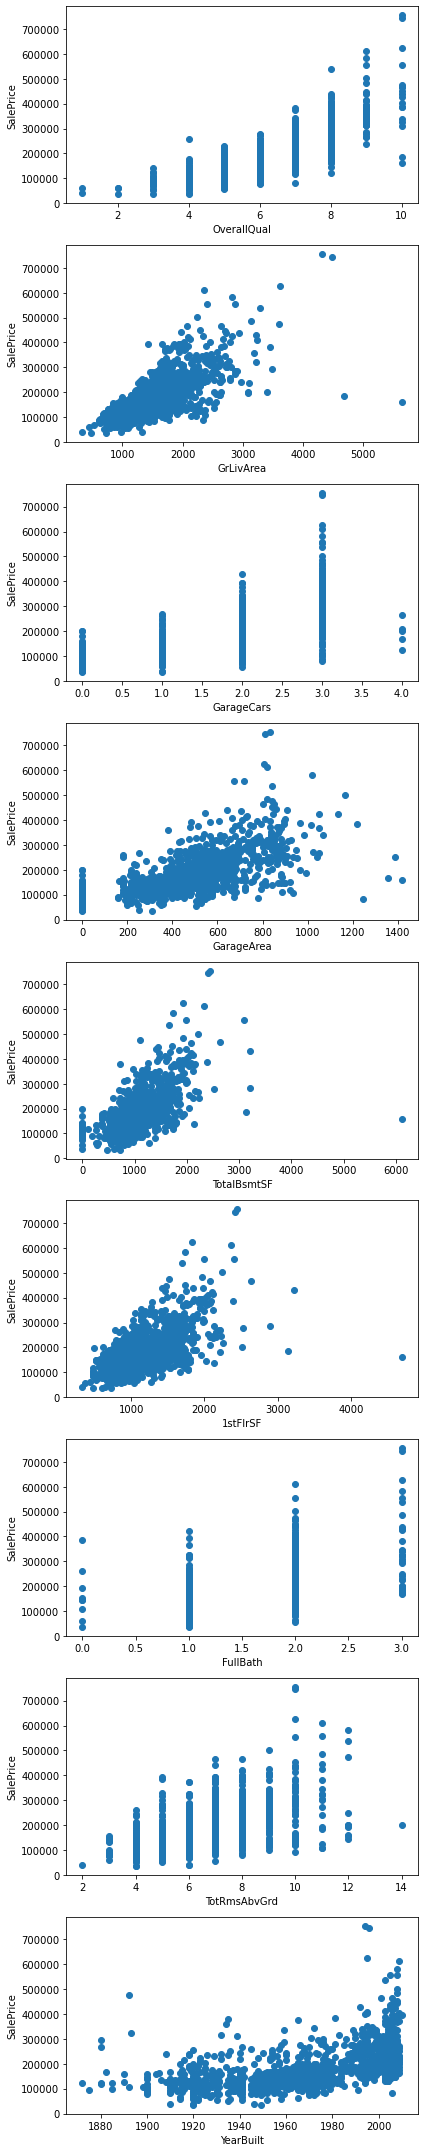

In [30]:
numeric_cols = ['GrLivArea','GarageArea','TotalBsmtSF','1stFlrSF','YearBuilt']
nominal_cols = ['OverallQual','GarageCars','FullBath','TotRmsAbvGrd']

fig,ax=plt.subplots(nrows=9,ncols=1,figsize=(6,30))
for i in range(len(top_features)):    

    ax[i].scatter(x=train[top_features[i]], y=train['SalePrice'])
    ax[i].set_xlabel('%s'%(top_features[i]))
    ax[i].set_ylabel('SalePrice')

plt.tight_layout()
plt.show();

In [31]:
# Handling Outliers
# Removing Outliers
Q1 = []
Q3 = []
Lower_bound = []
Upper_bound = []
Outliers = []


for i in top_features:
    
    # 25th and 75th percentiles
    q1, q3 = np.percentile(train[i],25), np.percentile(train[i],75)
    # Interquartile range
    iqr = q3 - q1
    # Outlier cutoff
    cut_off = 1.5*iqr
    # Lower and Upper bounds
    lower_bound = q1-cut_off
    upper_bound = q3+cut_off
        
    # save outlier indexes
    outlier = [x for x in train.index if train.loc[x,i]<lower_bound or train.loc[x,i]>upper_bound]
    
    # append values for DataFrame
    Q1.append(q1)
    Q3.append(q3)
    Lower_bound.append(lower_bound)
    Upper_bound.append(upper_bound)
    Outliers.append(len(outlier))
    
    try:
        train.drop(outlier,inplace=True,axis=0)
    except:
        continue

df_out = pd.DataFrame({'Column':top_features,'Q1':Q1,'Q3':Q3,'Lower bound':Lower_bound,'Upper_bound':Upper_bound,'No. of outliers':Outliers})    
df_out.sort_values(by='No. of outliers',ascending=False)

# The below table shows how many outliers were present in each column
# We have removed those rows

,Column,Q1,Q3,Lower bound,Upper_bound,No. of outliers
4,TotalBsmtSF,792.75,1266.25,82.500,1976.500,58
1,GrLivArea,1131.00,1778.25,160.125,2749.125,31
3,GarageArea,325.25,576.00,-50.875,952.125,14
7,TotRmsAbvGrd,5.00,7.00,2.000,10.000,11
5,1stFlrSF,866.00,1343.50,149.750,2059.750,7
2,GarageCars,1.00,2.00,-0.500,3.500,5
8,YearBuilt,1954.00,2000.00,1885.000,2069.000,5
0,OverallQual,5.00,7.00,2.000,10.000,2
6,FullBath,1.00,2.00,-0.500,3.500,0


In [32]:
train.shape # 1460 entries were originally present

(1327, 81)

In [33]:
# number of rown in train
ntrain = train.shape[0]

# remove skewness in data
target = np.log(train['SalePrice'])

# drop Id and SalePrice from train dataframe
train.drop(['Id','SalePrice'],inplace=True,axis=1)

# store test Id
test_id = test['Id']

#drop test Id
test.drop(['Id'],inplace=True,axis=1)

#concatenate train and test dataframes
train = pd.concat([train,test])

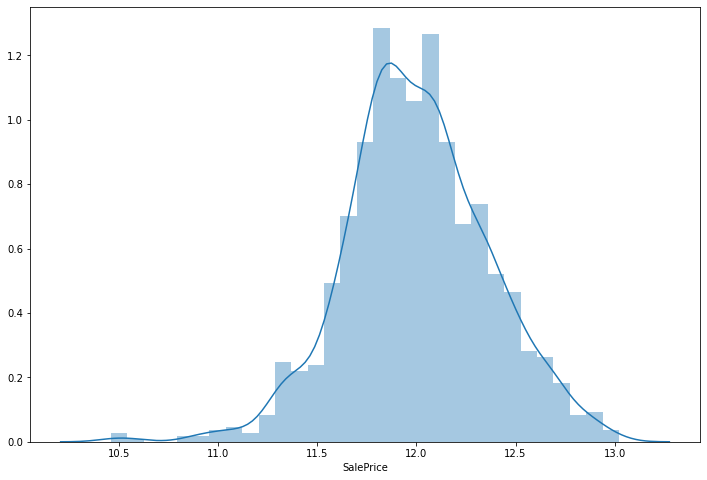

In [34]:
sns.distplot(target) # Looks symmetric

In [36]:
# Checking missing data
train.isna().sum().sort_values(ascending=False).head(20)

PoolQC          2780
MiscFeature     2688
Alley           2595
Fence           2234
FireplaceQu     1375
LotFrontage      464
GarageCond       147
GarageQual       147
GarageYrBlt      147
GarageFinish     147
GarageType       145
BsmtCond          45
BsmtExposure      45
BsmtQual          44
BsmtFinType1      42
BsmtFinType2      42
MasVnrType        22
MasVnrArea        21
MSZoning           4
BsmtHalfBath       2
dtype: int64

In [37]:
train['PoolQC'].unique()
# From data description file we know that houses with no pools have nan/empty values

array([nan, 'Fa', 'Gd', 'Ex'], dtype=object)

In [38]:
#NA means no Pool
train['PoolQC'].replace(['Ex','Gd','TA','Fa',np.nan],[4,3,2,1,0],inplace=True)

# NA means no fence
train['Fence'].replace(['GdPrv','MnPrv','GdWo','MnWw',np.nan],[4,3,2,1,0],inplace=True)

# NA means no fireplace
train['FireplaceQu'].replace(['Ex','Gd','TA','Fa','Po',np.nan],[5,4,3,2,1,0],inplace=True)

#                                                 Nominal features
# NA means no miscellaneous feature
train['MiscFeature'].fillna('None',inplace=True)

# NA means no alley access
train['Alley'].fillna('None',inplace=True)

#                                               Numerical features
# Replace null lotfrontage with average of the neighborhood
train['LotFrontage'] = train.groupby('Neighborhood')['LotFrontage'].transform(lambda x:x.fillna(x.median()))


In [39]:
for i in ['BsmtCond','BsmtQual']:
    train[i].replace(['Ex','Gd','TA','Fa','Po',np.nan],[5,4,3,2,1,0],inplace=True)

train['BsmtExposure'].replace(['Gd','Av','Mn','No',np.nan],[4,3,2,1,0],inplace=True)

for i in ['BsmtFinType1','BsmtFinType2']:
    train[i].replace(['GLQ','ALQ','BLQ','Rec','LwQ','Unf',np.nan],[6,5,4,3,2,1,0],inplace=True)     

#                                               Numerical features
for i in ['BsmtHalfBath','BsmtFullBath','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF']:
    train[i].fillna(0,inplace=True)

In [40]:
#NA means no masonary work
train['MasVnrType'].fillna('None',inplace=True)

#If no masonary work, then area is 0
train['MasVnrArea'].fillna(0,inplace=True)

#Replace with the most common value
for i in ['MSZoning','Utilities']:
    train[i].fillna(train[i].mode()[0],inplace=True)

#"Assume typical unless deductions are warranted"
train['Functional'].fillna('Typ',inplace=True)

#Replace with others
train['SaleType'].fillna('Oth',inplace=True)
#Replace with most common value
train['Electrical'].fillna(train['Electrical'].mode()[0],inplace=True)

#Replace with 'Other' value
for i in ['Exterior1st','Exterior2nd']:
    train[i].fillna('Other',inplace=True)
    
#Replace with most common value
train['KitchenQual'].fillna(train['KitchenQual'].mode()[0],inplace=True)
#ordinal value
train['KitchenQual'].replace(['Ex','Gd','TA','Fa','Po'],[4,3,2,1,0],inplace=True)

In [41]:
train['CentralAir'].replace(['N','Y'],[0,1],inplace=True)
#                                                 Nominal features
for i in ['HeatingQC','ExterCond','ExterQual']:
    train[i].replace(['Ex','Gd','TA','Fa','Po'],[4,3,2,1,0],inplace=True)

In [42]:
# Total surface area of house
train['TotalSF'] = train.apply(lambda x: x['1stFlrSF'] + x['2ndFlrSF'] + x['TotalBsmtSF'], axis=1)

# Total number of bathrooms in the house
train['TotalBath'] = train.apply(lambda x: x['FullBath'] + 0.5*x['HalfBath'] + x['BsmtFullBath'] + 0.5*x['BsmtHalfBath'], axis=1)

# Total Porch area in the house
train['TotalPorch'] = train.apply(lambda x: x['OpenPorchSF'] + x['EnclosedPorch'] + x['3SsnPorch'] + x['ScreenPorch'], axis=1)

# New house or an old house
train['NewHouse'] = train.apply(lambda x: 1 if x['SaleCondition']=='Partial' else 0, axis=1)


In [43]:
# One-Hot encoding
train = pd.get_dummies(train,drop_first=True)
train.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,ExterCond,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,65.0,8450,7,5,2003,2003,196.0,3,2,...,0,0,0,0,1,0,0,0,1,0
1,20,80.0,9600,6,8,1976,1976,0.0,2,2,...,0,0,0,0,1,0,0,0,1,0
2,60,68.0,11250,7,5,2001,2002,162.0,3,2,...,0,0,0,0,1,0,0,0,1,0
3,70,60.0,9550,7,5,1915,1970,0.0,2,2,...,0,0,0,0,1,0,0,0,0,0
4,60,84.0,14260,8,5,2000,2000,350.0,3,2,...,0,0,0,0,1,0,0,0,1,0


In [46]:
'CentralAir' in train.columns

True

In [47]:
train['CentralAir']

0       1
1       1
2       1
3       1
4       1
       ..
1454    1
1455    1
1456    1
1457    1
1458    1
Name: CentralAir, Length: 2786, dtype: int64

In [65]:
#train['GarageArea'].unique()
train['GarageArea'].fillna(train['GarageArea'].mean(),inplace=True)
train['GarageCars'].fillna(train['GarageCars'].mode()[0], inplace=True)

In [69]:
test.isnull().sum().sort_values(ascending=False)

SaleCondition_Partial    0
LotConfig_FR2            0
Neighborhood_Edwards     0
Neighborhood_Crawfor     0
Neighborhood_CollgCr     0
                        ..
Exterior1st_Other        0
Exterior1st_MetalSd      0
Exterior1st_ImStucc      0
Exterior1st_HdBoard      0
MSSubClass               0
Length: 218, dtype: int64

In [66]:
# Separate datasets
# train dataset
df = train.iloc[:ntrain,:]

# test dataset
test = train.iloc[ntrain:,:]

In [70]:
from sklearn.model_selection import train_test_split

X = df
y = target

# training and validation set
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.1)


In [71]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

lr = LinearRegression()

lr.fit(X_train,y_train)

rmse = np.sqrt(mean_squared_error(y_test,lr.predict(X_test)))
print(rmse)

0.12687465858146482


In [72]:
# Ridge Regression Model
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error

# different alpha values
alphas = [0.01, 0.1, 0.3, 1, 3, 5, 10, 15, 20]

for a in alphas:

    lr = Ridge(alpha=a)
    
    lr.fit(X_train,y_train)
    
    rmse = np.sqrt(mean_squared_error(y_test,lr.predict(X_test)))
    print('For Alpha = ',a,', RMSE = ',rmse)

For Alpha =  0.01 , RMSE =  0.12607856487624625
For Alpha =  0.1 , RMSE =  0.12278995021971302
For Alpha =  0.3 , RMSE =  0.11859735387223383
For Alpha =  1 , RMSE =  0.11219304480448646
For Alpha =  3 , RMSE =  0.10709539775405655
For Alpha =  5 , RMSE =  0.10551257794277245
For Alpha =  10 , RMSE =  0.1041468800097317
For Alpha =  15 , RMSE =  0.10367625440122141
For Alpha =  20 , RMSE =  0.10345949157272401


In [73]:
model = Ridge(alpha=3)
model.fit(X_train,y_train)

Ridge(alpha=3)

In [74]:
log_pred = model.predict(test)
actual_pred = np.exp(log_pred)

In [ ]:
data_dict = {'Id':test_id,'SalePrice':actual_pred}

submit = pd.DataFrame(data_dict)
submit.to_csv('submission.csv',index=False)